# Load Pickle

In [1]:
import pickle
root_wd = '/Users/zakkyang/Documents/Data_Mining/Python/Projects/0_My_Project/Online_Shopper_Prediction/'
data= pickle.load(open(root_wd + 'Pickle/feature_completed.p', 'rb'))

# Load Libraries

In [2]:
import pandas as pd
import numpy as np
import datetime
import gc

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score


import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from jupyterthemes import jtplot
jtplot.style(theme='oceans16')
jtplot.style(context='talk', fscale=1.5, spines=False, gridlines='')

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'w'
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

# Data Split

In [3]:
#set the seed
seed = 7

#feature selection if necessary

#rename the target
label = 'Revenue'
data.rename(columns={label:'label'}, inplace=True)

#split the data with stratification
y= data.label
train, test = train_test_split(data,test_size=0.2,random_state=seed, stratify=y) 
feature_name = [x for x in train.columns if x not in ['label']]
dtrain = xgb.DMatrix(train[feature_name],label=train['label'])
dtest = xgb.DMatrix(test[feature_name],label=test['label'])

'The number of training features is {}, and the number of training entries is {}'\
    .format(dtrain.num_col(),dtrain.num_row())

'The number of training features is 58, and the number of training entries is 9864'

# Modeling

In [4]:
params = {
    'booster': 'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'gamma': 0.1,
    'min_child_weight': 1,
    'max_depth': 5,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'colsample_bylevel': 0.7,
    'eta': 0.01,
    'tree_method': 'exact',
    'seed': 7,
    'silent': 1,
    'nthread': 4
}

#define the watch list to print the auc results
watchlist = [(dtest, 'eval'), (dtrain, 'train')]
model1 = xgb.train(params, dtrain, 200, watchlist)

#save the model
model1.save_model('xgb_model1')
#load the model
#model1 = xgb.Booster()
#model1.load_model('xgb_model1')

[0]	eval-auc:0.726373	train-auc:0.733668
[1]	eval-auc:0.739106	train-auc:0.756782
[2]	eval-auc:0.880347	train-auc:0.902092
[3]	eval-auc:0.900864	train-auc:0.919144
[4]	eval-auc:0.905684	train-auc:0.924925
[5]	eval-auc:0.908476	train-auc:0.929016
[6]	eval-auc:0.909484	train-auc:0.929722
[7]	eval-auc:0.912214	train-auc:0.932911
[8]	eval-auc:0.911323	train-auc:0.930998
[9]	eval-auc:0.913401	train-auc:0.9321
[10]	eval-auc:0.914593	train-auc:0.933226
[11]	eval-auc:0.915396	train-auc:0.934169
[12]	eval-auc:0.915912	train-auc:0.934927
[13]	eval-auc:0.915857	train-auc:0.935422
[14]	eval-auc:0.916142	train-auc:0.935957
[15]	eval-auc:0.916511	train-auc:0.936672
[16]	eval-auc:0.916845	train-auc:0.937286
[17]	eval-auc:0.916855	train-auc:0.937923
[18]	eval-auc:0.917101	train-auc:0.938048
[19]	eval-auc:0.917055	train-auc:0.938134
[20]	eval-auc:0.917187	train-auc:0.938275
[21]	eval-auc:0.917218	train-auc:0.938562
[22]	eval-auc:0.917601	train-auc:0.938925
[23]	eval-auc:0.918047	train-auc:0.939019
[24]

[194]	eval-auc:0.928235	train-auc:0.949889
[195]	eval-auc:0.928286	train-auc:0.949954
[196]	eval-auc:0.928281	train-auc:0.950002
[197]	eval-auc:0.928351	train-auc:0.950055
[198]	eval-auc:0.928407	train-auc:0.950076
[199]	eval-auc:0.928468	train-auc:0.950114


In [5]:
#add one column to see the probability of 1
test['probability'] = model1.predict(dtest)
test['prediction'] = test['probability'].apply(lambda x: 1 if x>=0.5 else 0)
test.to_csv('test_result_by_xgb_model1.csv',index=None,header=None)

In [6]:
test[['label','prediction']]

,label,prediction
641,1,0
9382,0,1
1447,0,0
3902,0,0
4533,0,0
11910,0,1
11332,0,0
6120,0,0
9536,1,1
4139,0,0


## F1

In [7]:
from sklearn.metrics import classification_report
y_true = test['label']
y_pred = test['prediction']
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2084
           1       0.72      0.54      0.62       382

   micro avg       0.90      0.90      0.90      2466
   macro avg       0.82      0.75      0.78      2466
weighted avg       0.89      0.90      0.89      2466



## AUC

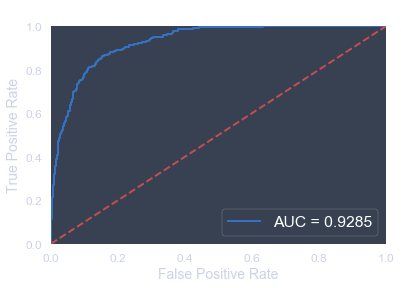

In [8]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds = test['probability']
y_test = test['label']
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Feature Importance

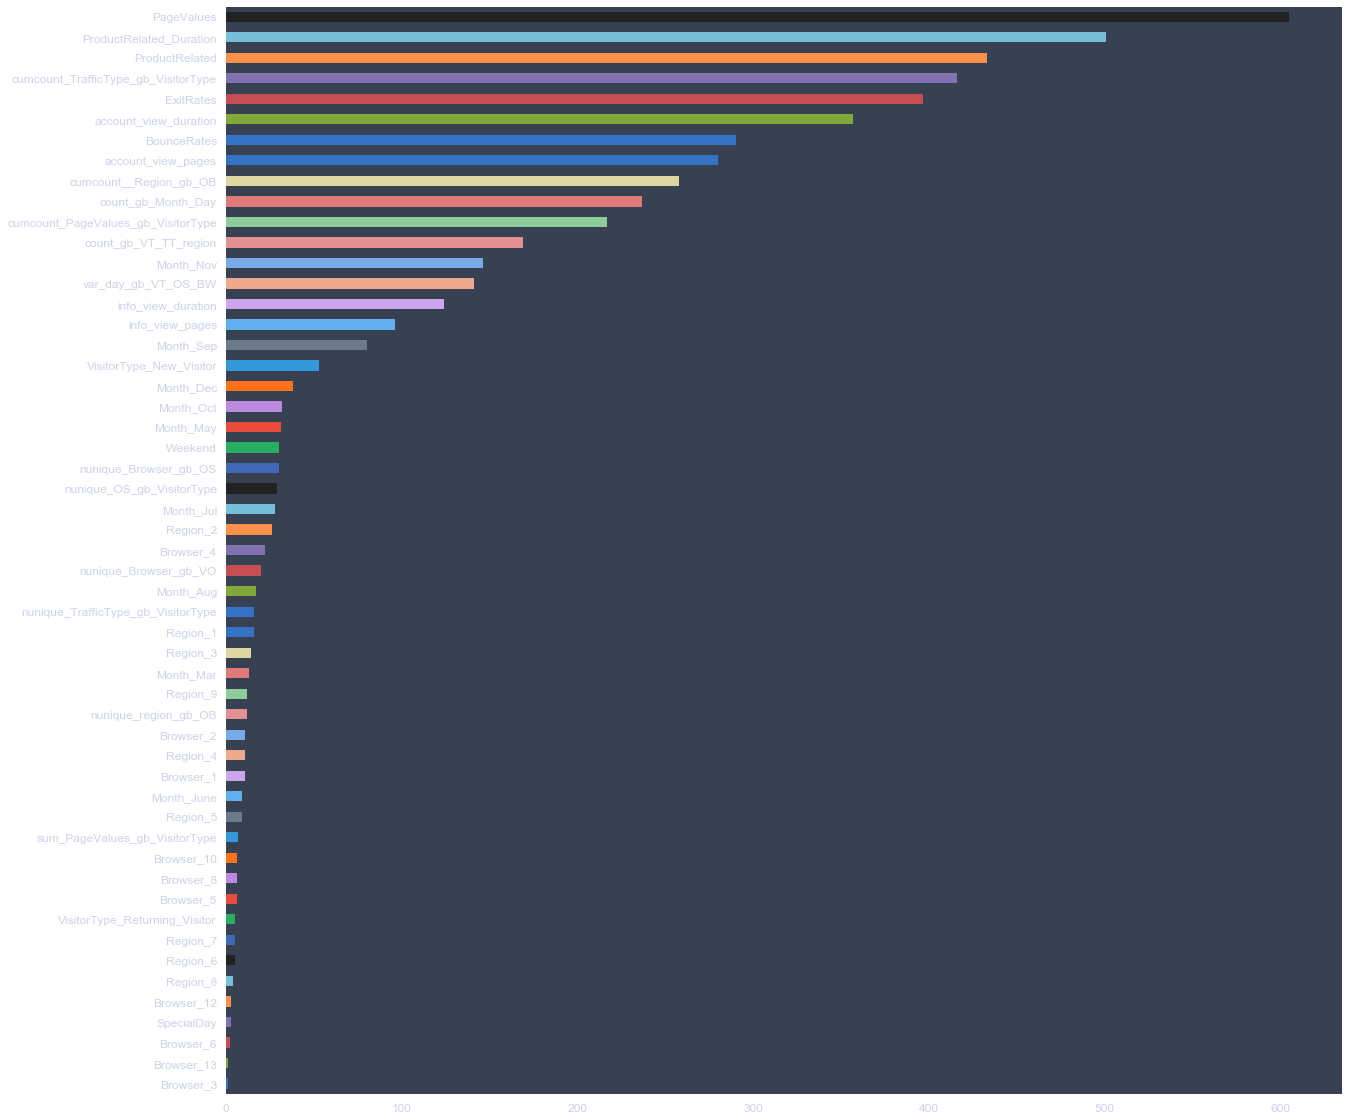

In [9]:
plt.figure(figsize=(20,20))
pd.Series(model1.get_fscore()).sort_values(ascending=True).plot(kind='barh')